## **Práctica 18: Clustering Particional y Clasificación (Clientes)**

Nombre: Angel Damian Monroy Mendoza

Nro. Cuenta: 316040707

Email: adamianmm@gmail.com

### **Caso de estudio**

El conjunto de datos contiene información sobre el comportamiento de compra de 2000 personas en una tienda física. Todos los datos se han recopilado a través de las tarjetas de fidelización que utilizan al finalizar la compra. Los datos han sido preprocesados y anonimizado para proteger la privacidad de los clientes.

**Objetivo.** Segmentar datos del comportamiento de compra en una tienda física y hacer una clasificación múltiple en función de los parámetros disponibles.

**Emplear los algoritmos:** 

* K-means para segmentar los datos.
* Bosque aleatorio para la clasificación múltiple.

**Fuente de datos:**

https://www.kaggle.com/code/karthickaravindan/k-means-clustering-project/data

**Variables:**

* 1) ID: Es el identificador único de un cliente.
* 2) Sex: Género de un cliente (0 = hombre, 1 = mujer).
* 3) Marital status: Estado civil de un cliente (0 = soltero, 1 = no soltero -divorciado/separado/casado/viudo-).
* 4) Age: Es la edad del cliente (18 años es el valor mínimo y 76 es el valor máximo).
* 5) Education: Nivel de educación del cliente (0 = otro/desconocido, 1 = escuela secundaria, 2 = universidad; 3 = posgrado).
* 6) Income: Es el ingreso anual en dólares autorreportado por el cliente.
* 7) Occupation: Ocupación del cliente (0 = desempleado/no calificado, 1 = empleado calificado/funcionario, 2 = directivos/autónomos/empleado altamente cualificado/funcionario).
* 8) Settlement size: Es el tamaño de la ciudad en la que vive el cliente (0 = pequeña ciudad, 1 = ciudad mediana, 2 = gran ciudad).

#### **1) Importar las bibliotecas necesarias y los datos**

In [1]:
import pandas as pd               # Para la manipulación y análisis de datos
import numpy as np                # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt   # Para la generación de gráficas a partir de los datos
import seaborn as sns             # Para la visualización de datos basado en matplotlib
%matplotlib inline 

In [2]:
url='https://raw.githubusercontent.com/aDamianMonroym/Mineria-de-Datos/main/Datos/Segmentation.csv'
Clientes = pd.read_csv(url)
Clientes

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [227]:
Clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [228]:
print(Clientes.groupby('Sex').size()) 

Sex
0    1086
1     914
dtype: int64


In [3]:
Clientes.drop(['ID'], axis=1, inplace=True)
Clientes

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


#### **2) Selección de características**

**Matriz de correlaciones**

Una matriz de correlaciones es útil para analizar la relación entre las variables numéricas.
Se emplea la función corr()

In [230]:
CorrClientes = Clientes.corr(method='pearson')
CorrClientes

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


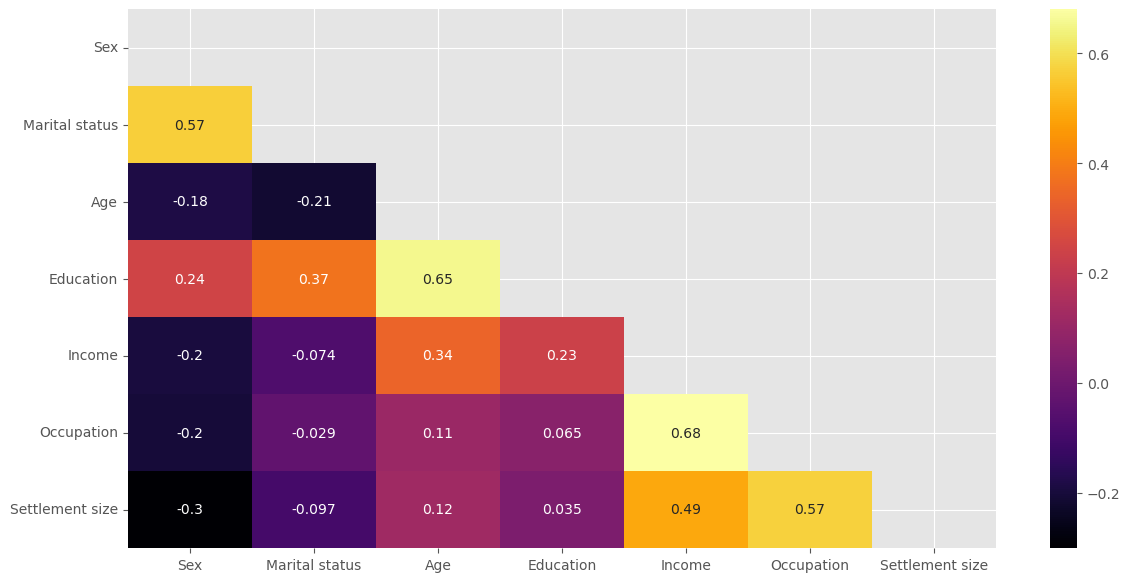

In [231]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrClientes)
sns.heatmap(CorrClientes, cmap='inferno', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

Ante una sola presencia de correlaciones altas (fuertes), se consideran a todas las variables para la construcción de los modelos, pues las dos variables se consideran de alta relevancia para el caso de estudio.

* Sex.
* Marital status.
* Age.
* Education.
* Income.
* Occupation.
* Settlement size.

### **Modelo 1: Segmentación particional**

**Algoritmo: K-means**

Los clústeres mediante K-means es un aprendizaje no supervisado popular. Se utiliza para encontrar grupos intrínsecos dentro del conjunto de datos sin etiquetar y extraer inferencias de ellos.

Cuando se trabaja con clustering, dado que son algoritmos basados en distancias, es fundamental escalar los datos para que cada una de las variables contribuyan por igual en el análisis.

In [4]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
estandarizar = StandardScaler()                         # Se instancia el objeto StandardScaler o MinMaxScaler 
MEstandarizada = estandarizar.fit_transform(Clientes)   # Se calculan la media y desviación y se escalan los datos
pd.DataFrame(MEstandarizada)

,0,1,2,3,4,5,6
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298
...,...,...,...,...,...,...,...
1995,1.090038,-0.993024,0.946616,-0.063372,0.067471,-1.269525,-0.909730
1996,1.090038,1.007025,-0.760382,-0.063372,-0.084265,0.296823,-0.909730
1997,-0.917399,-0.993024,-0.418983,-1.731068,-0.906957,-1.269525,-0.909730
1998,1.090038,1.007025,-1.016432,-0.063372,-0.603329,-1.269525,-0.909730


In [5]:
#Se importan las bibliotecas
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Principal\anaconda3\lib\site-pa

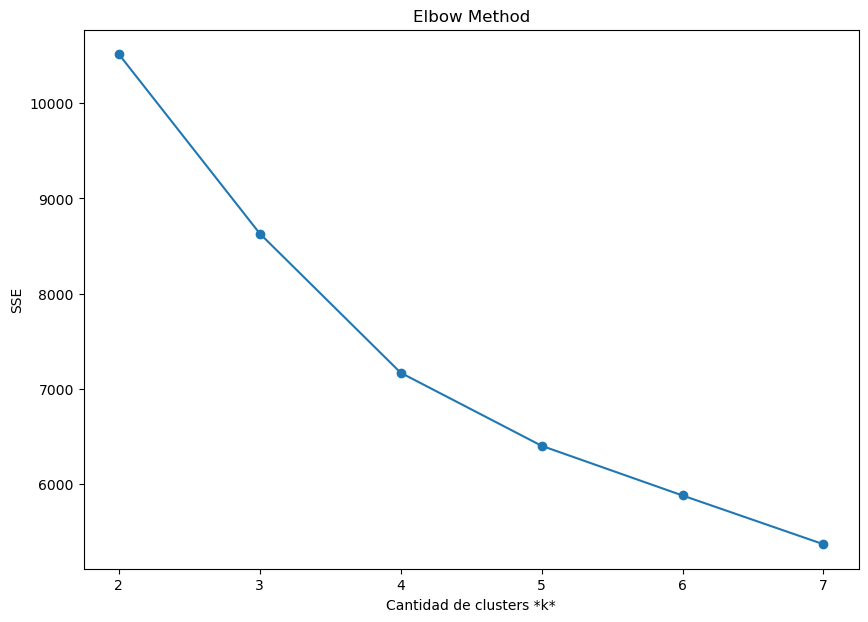

In [7]:
#Definición de k clusters para K-means
#Se utiliza random_state para inicializar el generador interno de números aleatorios
SSE = []
for i in range(2, len(Clientes.columns)+1):
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(MEstandarizada)
    SSE.append(km.inertia_)

#Se grafica SSE en función de k
plt.figure(figsize=(10, 7))
plt.plot(range(2, len(Clientes.columns)+1), SSE, marker='o')
plt.xlabel('Cantidad de clusters *k*')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

**Observación.** 
En la práctica, puede que no exista un codo afilado (codo agudo) y, como método heurístico, ese "codo" no siempre puede identificarse sin ambigüedades. Por esta razón, se utiliza como apoyo el "método de la rodilla".

In [12]:
!pip install kneed

In [20]:
pip show pandas

Name: pandas
Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: c:\users\principal\anaconda3\lib\site-packages
Requires: numpy, python-dateutil, pytz
Required-by: datashader, holoviews, hvplot, neptune-client, seaborn, statsmodels, xarray, yfinance
Note: you may need to restart the kernel to use updated packages.


In [8]:
from kneed import KneeLocator
kl = KneeLocator(range(2, len(Clientes.columns)+1), SSE, curve="convex", direction="decreasing")
kl.elbow

4

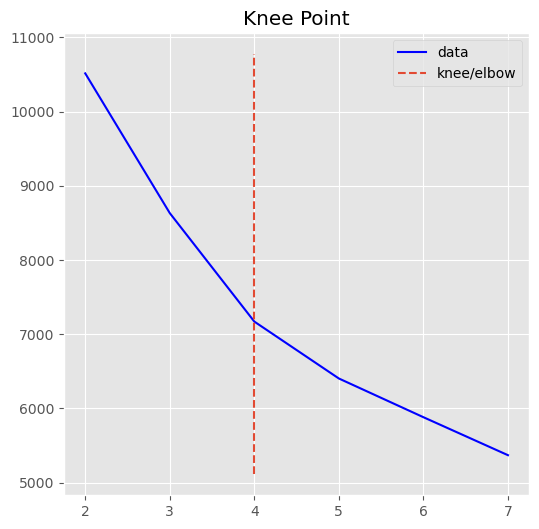

In [9]:
plt.style.use('ggplot')
kl.plot_knee()

In [235]:
#Se crean las etiquetas de los elementos en los clusters
MParticional = KMeans(n_clusters=4, random_state=0)
MParticional.fit(MEstandarizada)
MParticional.labels_

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([3, 0, 1, ..., 1, 0, 1])

In [236]:
Clientes['clusterP'] = MParticional.labels_
Clientes

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusterP
0,0,0,67,2,124670,1,2,3
1,1,1,22,1,150773,1,2,0
2,0,0,49,1,89210,0,0,1
3,0,0,45,1,171565,1,1,2
4,0,0,53,1,149031,1,1,2
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,1
1996,1,1,27,1,117744,1,0,0
1997,0,0,31,0,86400,0,0,1
1998,1,1,24,1,97968,0,0,0


In [237]:
#Cantidad de elementos en los clusters
Clientes.groupby(['clusterP'])['clusterP'].count()

clusterP
0    705
1    462
2    570
3    263
Name: clusterP, dtype: int64

In [238]:
Clientes[Clientes.clusterP == 1]

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,clusterP
2,0,0,49,1,89210,0,0,1
5,0,0,35,1,144848,0,0,1
13,0,0,60,2,89374,0,0,1
16,0,0,53,1,125550,1,0,1
22,0,0,48,1,89804,0,0,1
...,...,...,...,...,...,...,...,...
1993,1,0,38,1,87670,0,0,1
1994,0,0,45,1,113414,1,0,1
1995,1,0,47,1,123525,0,0,1
1997,0,0,31,0,86400,0,0,1


Obtención de los centroides

In [239]:
CentroidesP = Clientes.groupby('clusterP').mean()
CentroidesP

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
clusterP,,,,,,,
0,0.853901,0.997163,28.963121,1.068085,105759.119149,0.634043,0.422695
1,0.352814,0.019481,35.577922,0.746753,97859.852814,0.329004,0.043290
2,0.029825,0.173684,35.635088,0.733333,141218.249123,1.271930,1.522807
3,0.501901,0.692015,55.703422,2.129278,158338.422053,1.129278,1.110266


* **Clúster 0:** Es un grupo formado por 705 elementos conformados por mujeres en su mayoria 0.85 (0 = hombre, 1 = mujer), en su mayoría *no* solteras 0.997 (0 = soltero, 1 = NO soltero), de adultas jóvenes con una edad promedio de 29 años (28.96), en su mayoría con los grados de estudios de secundaria (0 = otro/desconocido, 1 = escuela secundaria, 2 = universidad; 3 = posgrado), un ingreso anual en dólares de 105,759 dólares, en su mayoría empleada calificada o funcionaria 0.63 (0 = desempleado/no calificado, 1 = empleado calificado/funcionario, 2 = directivos/autónomos/empleado altamente cualificado/funcionario) y en su mayoría con un tamaño de la ciudad en la que vive pequeña 0.42 (0 = pequeña ciudad, 1 = ciudad mediana, 2 = gran ciudad).
* **Clúster 1:** Es un grupo formado por 462 elementos conformados por hombres en su mayoria (0.35), en su mayoría *si* son solteros (0.019), de adultos con una edad promedio de 35 años (35.57), en su mayoría con los grados de estudios desconocidos u otro tipo de estudios (0.746), un ingreso anual en dólares de 97,859 dólares, en su mayoría desempleado o no calificada (0.32) y en su mayoría con un tamaño de la ciudad en la que vive pequeña (0.42). 
* **Clúster 2:** Es un grupo formado por 570 elementos conformados por hombres en su mayoria (0.02), en su mayoría *si* son solteros (0.173), de adultos con una edad promedio de 35 años (35.63), en su mayoría con los grados de estudios desconocidos u otro tipo de estudios (0.733), un ingreso anual en dólares de 141,218 dólares, en su mayoría empleado calificado o funcionario (1.27) y en su mayoría con un tamaño de la ciudad en la que vive mediana (1.52).
* **Clúster 3:** Es un grupo formado por 263 elementos conformados por hombres y mujeres (0.5), en su mayoría *si* son solteros (0.69), de adultos con una edad promedio de 55 años (55.7), en su mayoría con los grados de estudios de universidad (2.12), un ingreso anual en dólares de 158,338 dólares, en su mayoría empleado calificado o funcionario (1.12) y en su mayoría con un tamaño de la ciudad en la que vive mediana (1.11).

In [240]:
# Gráfica de los elementos y los centros de los clusters
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (10, 7)
plt.style.use('ggplot')
colores=['red', 'blue', 'green', 'yellow']
asignar=[]
for row in MParticional.labels_:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(MEstandarizada[:, 0], 
           MEstandarizada[:, 1], 
           MEstandarizada[:, 2], marker='o', c=asignar, s=60)
ax.scatter(MParticional.cluster_centers_[:, 0], 
           MParticional.cluster_centers_[:, 1], 
           MParticional.cluster_centers_[:, 2], marker='o', c=colores, s=1000)
plt.show()

<Figure size 1000x700 with 0 Axes>

### **Modelo 2: Clasificación múltiple**

**Algoritmo: Bosques aleatorios**

Definición de las variables predictoras y variable clase

In [241]:
#Variables predictoras
X = np.array(Clientes[['Sex','Marital status','Age','Education','Income', 'Occupation','Settlement size']])
pd.DataFrame(X)

,0,1,2,3,4,5,6
0,0,0,67,2,124670,1,2
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0
1996,1,1,27,1,117744,1,0
1997,0,0,31,0,86400,0,0
1998,1,1,24,1,97968,0,0


In [242]:
#Variable clase
Y = np.array(Clientes[['clusterP']])
pd.DataFrame(Y)

,0
0,3
1,0
2,1
3,2
4,2
...,...
1995,1
1996,0
1997,1
1998,0


In [243]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [244]:
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, 
                                                                                test_size = 0.2, 
                                                                                random_state = 0,
                                                                                shuffle = True)

In [245]:
print(len(X_train))
print(len(X_validation))

1600
400


In [246]:
# ClasificacionBA = RandomForestClassifier(random_state=0)
# ClasificacionBA.fit(X_train, Y_train)

ClasificacionBA = RandomForestClassifier(n_estimators=105,
                                         max_depth=8, 
                                         min_samples_split=4, 
                                         min_samples_leaf=2, 
                                         random_state=1234)
ClasificacionBA.fit(X_train, Y_train)

C:\Users\Principal\AppData\Local\Temp\ipykernel_15520\962749647.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ClasificacionBA.fit(X_train, Y_train)


RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=4,
                       n_estimators=105, random_state=1234)

In [247]:
#Clasificación final 
Y_ClasificacionBA = ClasificacionBA.predict(X_validation)
print(Y_ClasificacionBA)

[0 2 2 1 0 2 0 1 0 3 2 1 0 1 0 0 2 0 0 2 0 2 1 2 3 0 2 0 2 1 1 2 1 0 3 2 3
 2 3 0 3 0 3 2 0 2 2 3 1 2 0 0 2 0 2 2 0 0 3 1 0 0 0 1 0 2 2 2 2 2 0 3 0 0
 0 0 0 1 0 0 1 2 2 2 0 2 0 2 3 1 1 3 2 0 0 1 1 3 0 1 0 2 2 1 2 0 2 0 3 2 0
 1 2 3 0 2 0 2 2 2 0 2 3 0 0 3 2 1 0 2 1 2 0 0 1 3 3 2 3 0 0 3 2 0 0 0 0 0
 1 1 1 0 1 1 2 1 2 2 1 0 1 1 3 0 0 1 0 1 2 3 2 1 0 3 0 1 2 2 1 1 0 1 0 0 1
 0 2 2 2 1 2 2 2 0 2 0 0 1 2 0 3 2 0 2 0 0 0 0 2 0 3 2 1 2 0 0 1 3 0 0 2 2
 2 1 2 0 1 0 2 0 1 0 0 1 1 3 2 0 3 1 2 1 2 3 0 2 0 0 1 3 1 0 1 1 1 2 0 0 2
 2 3 0 0 2 2 2 1 1 1 1 1 0 3 1 0 3 1 2 0 3 0 2 1 2 3 2 2 0 0 1 0 1 2 2 2 0
 2 3 0 0 0 3 2 1 2 0 0 2 1 1 2 3 0 3 1 2 1 0 3 1 1 3 1 0 1 1 0 0 0 0 2 1 0
 3 0 0 3 2 0 0 1 0 1 3 0 1 1 2 1 2 3 1 1 2 1 1 2 0 0 1 0 0 1 3 3 0 0 0 0 0
 2 0 1 2 0 0 2 2 2 1 3 0 1 2 0 0 2 1 2 1 2 2 1 1 0 0 3 0 1 2]


In [248]:
ValoresBA = pd.DataFrame(Y_validation, Y_ClasificacionBA)
ValoresBA

,0
0,0
2,2
2,2
1,1
0,0
...,...
0,0
3,3
0,0
1,1


In [249]:
accuracy_score(Y_validation, Y_ClasificacionBA)

0.9875

In [250]:
#Matriz de clasificación
ModeloClasificacion = ClasificacionBA.predict(X_validation)
Matriz_Clasificacion = pd.crosstab(Y_validation.ravel(),
                                    ModeloClasificacion,
                                    rownames=['Reales'],
                                    colnames=['Clasificación']) 
Matriz_Clasificacion

Clasificación,0,1,2,3
Reales,,,,
0,141,1,0,0
1,0,93,0,2
2,0,2,113,0
3,0,0,0,48


In [251]:
#Reporte de la clasificación
print('Criterio: \n', ClasificacionBA.criterion)
print('Importancia variables: \n', ClasificacionBA.feature_importances_)
print("Exactitud:", accuracy_score(Y_validation, Y_ClasificacionBA))
print(classification_report(Y_validation, Y_ClasificacionBA))

Criterio: 
 gini
Importancia variables: 
 [0.12102911 0.26985737 0.11054991 0.14932479 0.07764031 0.08059688
 0.19100163]
Exactitud: 0.9875
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       142
           1       0.97      0.98      0.97        95
           2       1.00      0.98      0.99       115
           3       0.96      1.00      0.98        48

    accuracy                           0.99       400
   macro avg       0.98      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



#### **Eficiencia y conformación del modelo de clasificación**
* En la matriz de confusión se utilizó 400 instancias de prueba, clasificándose de manera errónea 5 casos. Esto hace que el modelo tenga un 98.75% de exactitud y un 100%, 97%, 100% y 96% de precisión para las clases 0, 1, 2 y 3, respectivamente.

* Por otro lado, el error promedio es de casi 1%.

In [253]:
Importancia = pd.DataFrame({'Variable': list(Clientes[['Sex','Marital status','Age','Education','Income', 'Occupation','Settlement size']]), 
                             'Importancia': ClasificacionBA.feature_importances_}).sort_values('Importancia', ascending=False)
Importancia

,Variable,Importancia
1,Marital status,0.269857
6,Settlement size,0.191002
3,Education,0.149325
0,Sex,0.121029
2,Age,0.110550
5,Occupation,0.080597
4,Income,0.077640


In [254]:
Estimador = ClasificacionBA.estimators_[50]
Estimador

DecisionTreeClassifier(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                       min_samples_split=4, random_state=650164161)

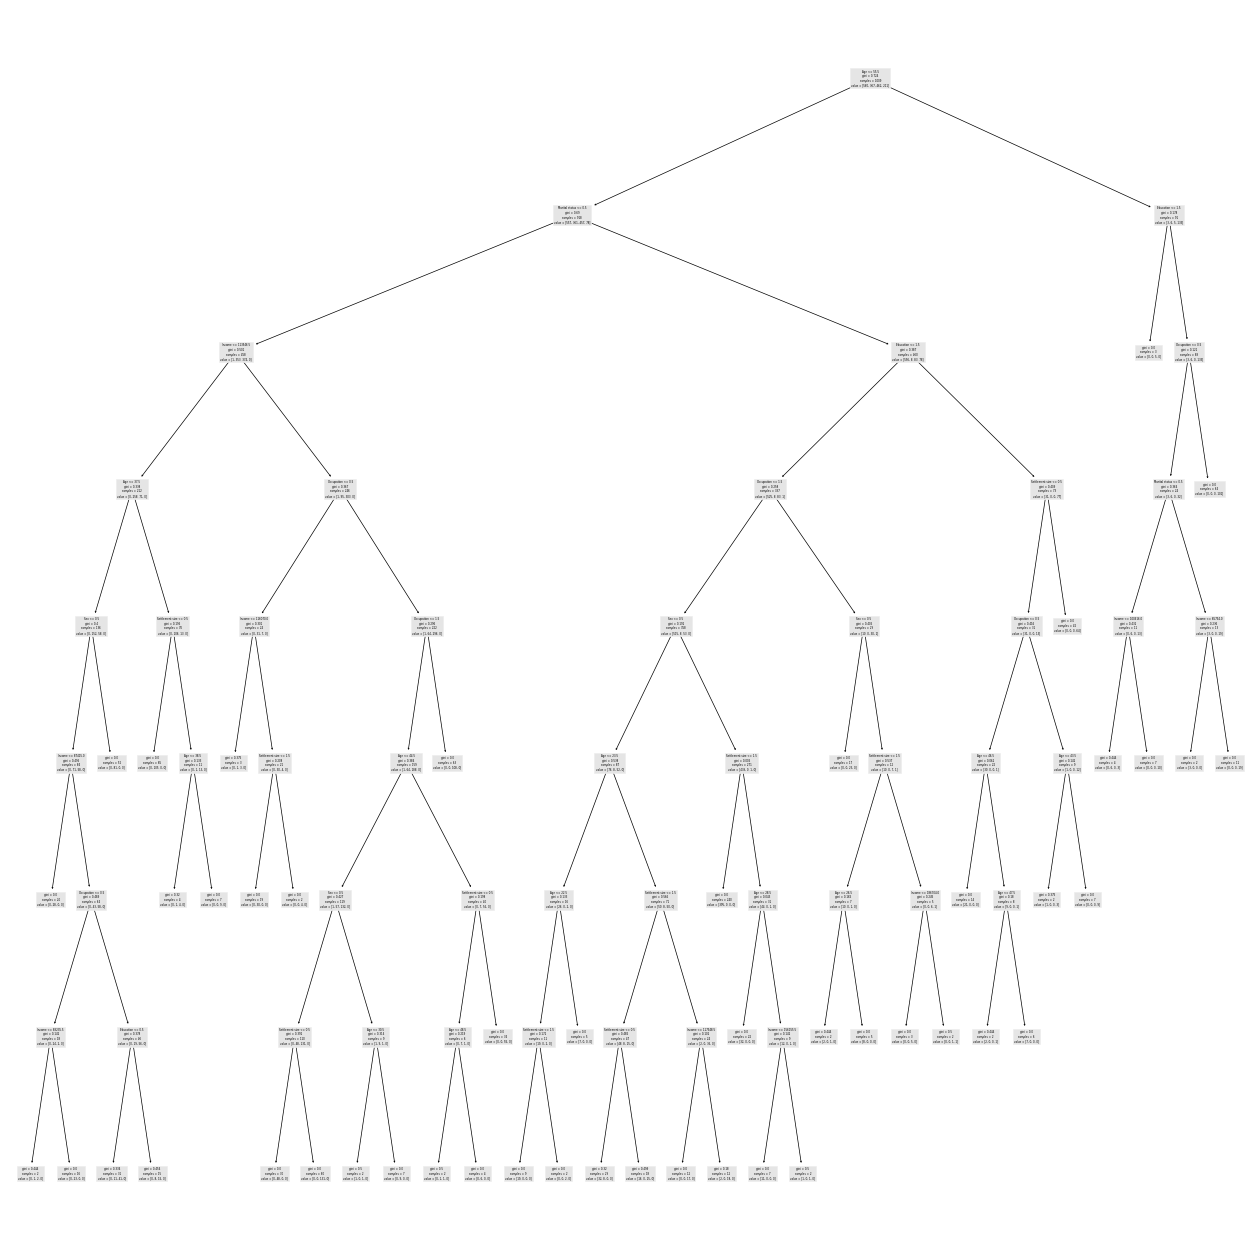

In [256]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,16))  
plot_tree(Estimador, 
          feature_names = ['Sex','Marital status','Age','Education','Income', 'Occupation','Settlement size'])
plt.show()

In [257]:
from sklearn.tree import export_text
Reporte = export_text(Estimador, 
                      feature_names = ['Sex','Marital status','Age','Education','Income','Occupation','Settlement size'])
print(Reporte)

|--- Age <= 55.50
|   |--- Marital status <= 0.50
|   |   |--- Income <= 113546.50
|   |   |   |--- Age <= 37.50
|   |   |   |   |--- Sex <= 0.50
|   |   |   |   |   |--- Income <= 87415.00
|   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- Income >  87415.00
|   |   |   |   |   |   |--- Occupation <= 0.50
|   |   |   |   |   |   |   |--- Income <= 88235.50
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- Income >  88235.50
|   |   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |   |--- Occupation >  0.50
|   |   |   |   |   |   |   |--- Education <= 0.50
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |   |   |   |--- Education >  0.50
|   |   |   |   |   |   |   |   |--- class: 2.0
|   |   |   |   |--- Sex >  0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |--- Age >  37.50
|   |   |   |   |--- Settlement size <= 0.50
|   |   |   |   |   |--- class: 1.0
|   |   |   |   |--- Settlement size >  0.50
|   |  

In [258]:
#Rendimiento
from sklearn.preprocessing import label_binarize
y_score = ClasificacionBA.predict_proba(X_validation)
y_test_bin = label_binarize(Y_validation, classes=[0,
                                                   1, 
                                                   2, 
                                                   3])
n_classes = y_test_bin.shape[1]

AUC para la clase 1: 0.9997816355497325
AUC para la clase 2: 0.999792924935289
AUC para la clase 3: 0.9995423340961098
AUC para la clase 4: 1.0


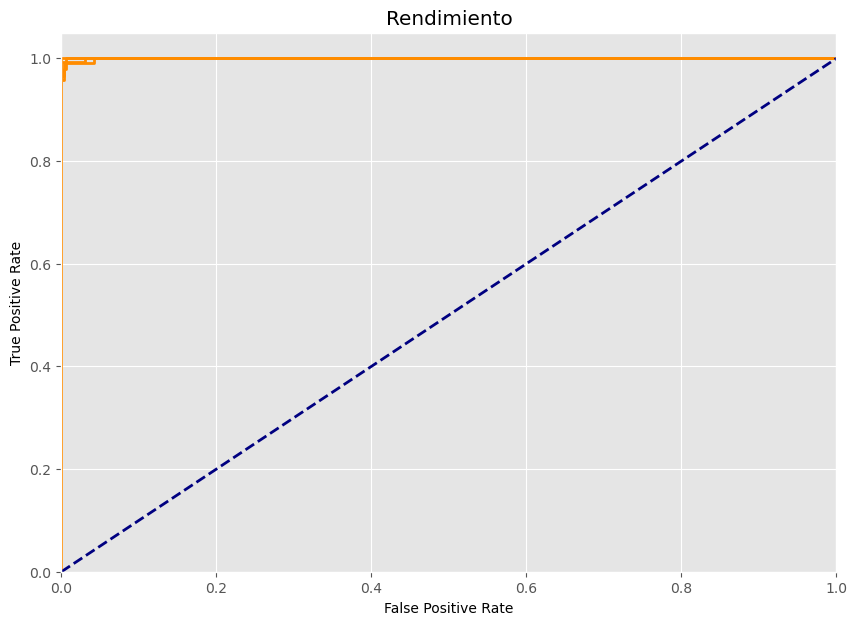

In [259]:
#Se calcula la curva ROC y el área bajo la curva para cada clase
from sklearn.metrics import roc_curve, auc

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
  fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
  plt.plot(fpr[i], tpr[i], color='darkorange', lw=2)
  print('AUC para la clase {}: {}'.format(i+1, auc(fpr[i], tpr[i])))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Rendimiento')
plt.show()

#### **Nuevas clasificaciones**

In [260]:
#Cliente
ClienteBA = pd.DataFrame({'Sex':[0],
                          'Marital status':[0],
                          'Age':[67],
                          'Education':[2],
                          'Income':[124670],
                          'Occupation':[1],
                          'Settlement size':[2]})
ClasificacionBA.predict(ClienteBA)

C:\Users\Principal\anaconda3\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


array([3])